## Simulación Casino
LAURA MARIA LEVI TAMATH PEREZ |  MARTIN EDUARDO ESPANA RIVERA |  JULIO ROBERTO HERRERA SABAN | SOFIA ALEXANDRA RUEDA LARA | OLIVER JOSUE DE LEON MILIAN


Tiempo simulado: 5 horas

In [127]:
from CasinoGambaSureña import *

# Abre el casino Gamba Sureña
# Promedio de clientes
average_incidence = 0.8
# Ruletas en el casino
roulette_n = 6
# cantidad de horas de simulacion
hours = 72

# Create Simulation
FdS = Casino(average_incidence=average_incidence, roulette_no=roulette_n, time=hours)
df_players, df_roulettes, df_bets = FdS.simulate()

Cantidad de personas que llegaron a jugar

In [128]:
len(df_players)

3090

Cantidad de dinero que ganó/perdió el casino

In [129]:
df_bets = df_bets.dropna().reset_index(drop=True)

casinoEarnings = 0

for i in range(len(df_bets)):
  if df_bets['earnings'][i] < 0:
    casinoEarnings += abs(df_bets['earnings'][i])

casinoEarnings


159876.0

Dinero total jugado

In [130]:
totalMoney = 0

for i in range(len(df_bets)):
  totalMoney += df_bets['amount'][i]

totalMoney

175417

Promedio de dinero ganado por cada jugador

In [131]:
df_bets['earnings'].mean()

4.14059853190288

Probabilidad de que el casino gane vs que el jugador gane

In [132]:
# Probabilidad de que el casino gane
len(df_bets[df_bets['win'] == False]) / len(df_bets)

0.9147374364765669

In [133]:
# Probabilidad de que el jugador gane
len(df_bets[df_bets['win'] == True]) / len(df_bets)

0.08526256352343309

Cantidad de rojos obtenidos

In [134]:
redCount = 0

for i in range(len(df_bets)):
  if df_bets['result'][i]['color'] == 'red':
    redCount += 1
# df_bets['result'][0]['color']

redCount

1683

Cantidad de negros obtenidos

In [135]:
blackCount = 0

for i in range(len(df_bets)):
  if df_bets['result'][i]['color'] == 'black':
    blackCount += 1

blackCount

1731

Cantidad de verdes obtenidos

In [136]:
greenCount = 0

for i in range(len(df_bets)):
  if df_bets['result'][i]['color'] == 'green':
    greenCount += 1

greenCount

128

Rondas jugadas

In [ ]:
roundResults = []

# Si se quisiera obtener las rondas por mesa
# for i in range(len(df_roulettes)): 
for j in range(len(df_bets)):
  if df_bets['result'][j] not in roundResults:
    roundResults.append(df_bets['result'][j])

len(roundResults)

Cantidad de rondas por jugador promedio

In [144]:
# sumRounds = 0
# for i in range(len(df_players)):
#     appears = 0
#     if len(df_bets[df_bets['player_no'] == i+1]) > 1:
#         appears = len(df_bets[df_bets['player_no'] == i+1])
#         print(f'player: {i} - rounds: {appears}')
    
#     else:
#         appears += 1

#     sumRounds += appears

# sumRounds/len(df_players)


In [139]:
from statistics import mean
rounds = df_bets.groupby(['player_no']).size()
mean(rounds)

1.1590314136125655

Promedio de tiempo de juego

In [140]:
mean(df_bets['wait_time'])

42.85203728096665

Cantidad de dinero por mesa

In [141]:
casinoEarnings_perTable = []
for i in range(len(df_roulettes)):
  casinoEarnings_perTable.append(0)


for i in range(len(df_roulettes)):
  for j in range(len(df_bets)):
    if df_bets['earnings'][j] < 0 and df_bets['roulette_no'][j] == [i]:
      casinoEarnings_perTable[i] += abs(df_bets['earnings'][j])

casinoEarnings_perTable

[23317.0, 24243.0, 29896.0, 30856.0, 23533.0, 28031.0]

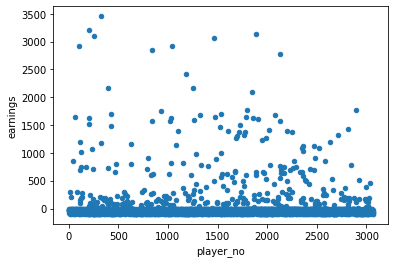

In [150]:
df_bets.plot.scatter(x='player_no', y='earnings')
# plt.ylim(min(df_bets['earnings']), max(df_bets['earnings']))
plt.show()
# df_bets
# max(df_bets['earnings'])

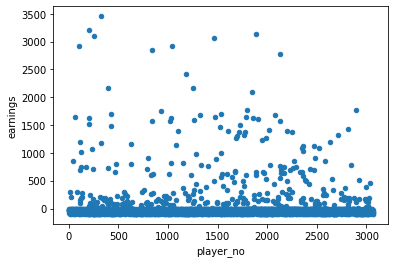

In [151]:
df_bets.plot.scatter(x='player_no', y='earnings')
plt.show()